
# Diseño de software para cómputo científico

----

## Unidad 2: Calidad


### Agenda de la Unidad 2
---

**Clase 1**
    
    - Calidad de software.
    - Principios de diseño: DRY y KISS 
    - Refactoreo.

**Clase 2**
    
    - Depuración de código.
    - Pruebas unitarias y funcionales con pytest.
    - Testing basados en propiedades (Hypothesis).

**Clase 3**

    - Cobertura de código (codecov).
    - Perfilado de código


## When and Why Your Code Starts to Smell Bad

> A code smell is a surface indication that usually corresponds to a deeper problem in the system. (Fowlser, 1996)

Hay dos sutilezas en la definición:

1. Un *code-smell* es un indicador facil de indicar. (un método muy largo por ejemplo) 
2. Un *code-smell* no siempre indican un problema.

Un code smell se soluciona con refactoreo.

## Code Refactoring


- Es remplazar una "parte" de código con una implementación superior, pero evitando cambios funcionales
 (Fowler and Beck, 1999).

In [1]:
import numpy as np

mtx = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]])

In [2]:
def find_bounds(mtx):
    ridxs, cidxs = [], []
    for ridx, row in enumerate(mtx):
        for cidx, col in enumerate(row):
            if mtx[ridx][cidx] != 0:
                ridxs.append(ridx)
                cidxs.append(cidx)
    return np.array([
        [min(ridxs), min(cidxs)], 
        [max(ridxs), max(cidxs)]])
            
find_bounds(mtx)

array([[1, 1],
       [2, 3]])

## Code Refactoring


- Es remplazar una "parte" de código con una implementación superior, pero evitando cambios funcionales
 (Fowler and Beck, 1999).

In [3]:
import numpy as np

mtx = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]])

In [6]:
def find_bounds_2(mtx):
    non_zero = np.argwhere(mtx != 0)
    return np.vstack([
        np.min(non_zero, axis=0), 
        np.max(non_zero, axis=0)])
            
assert np.all(find_bounds_2(mtx) == find_bounds(mtx))

## Calidad de software
----

In “Total Quality Control” (Feigenbaum, 1983) Feigenbaum defines software quality as

> “Quality is a customer determination, not an engineer’s determination, not a marketing determination, nor a general management determination. It is based on the customer’s actual experience with the product or service, measured against his or her requirements – stated or unstated, conscious or merely sensed, technically operational or entirely subjective – and always representing a moving target in a competitive market”


## KISS principle
---

- Acrónimo para: Keep it simple, stupid.
- Usado ampliamente en las fuerzas armadad de USA, in en el desarrollo de software.
- El termino fue acuñado por el Ing. Kelly Johnson. Refiriendose a al desafío de que el avión a reacción que estaban diseñando debe ser reparable por un mecánico promedio en el en condiciones de combate con solo unas pocas herramientas. 
- Por lo tanto, lo "estúpido" se refiere a la relación entre la forma en que se rompen las cosas y la sofisticación disponible para repararlas.


## DRY - Don't repeat yourself

- Toda pieza de conocimiento debe tener solamente una representación autoritaria e inequívoca dentro de un sistema.
- O en cristiano: No hacer dos funciones que hacen lo mismo.
- Formulado por  Andy Hunt y Dave Thomas en el libro *The Pragmatic Programmer*

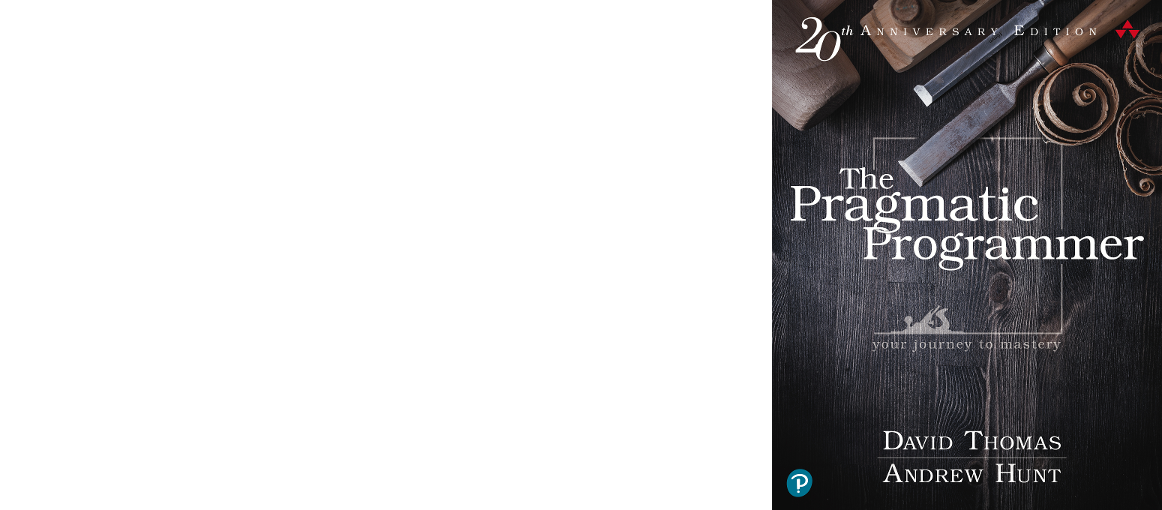

## Worse is better

- Acuñado por Richard P. Gabriel para describir la dinámica de la aceptación del software.
- Es la idea **subjetiva** de que la calidad no necesariamente aumenta con la funcionalidad
- que hay un punto en el que menos funcionalidad ("peor") es una opción preferible ("mejor") en términos de practicidad y usabilidad. 
- El software que es limitado, pero fácil de usar, puede ser más atractivo para el usuario y el mercado.

## Worse is better

"Worse-is-Better" es un modelo de diseño e implementación de software que tiene las siguientes características (en un orden de importancia aproximadamente descendente):

- **Sencillez (Simplicity)**
    
    El diseño debe ser simple, tanto en la implementación como en la interfaz. 

- **Exactitud (Correctness)**
    
    El diseño debe ser correcto en todos los aspectos observables, pero es un poco mejor ser simple que correcto.

- **Consistencia (Consistency)**
    
    El diseño no debe ser demasiado inconsistente.

- **Completitud (Completeness)**
    El diseño debe cubrir tantas situaciones importantes como sea práctico. 

## Diferencia entre error, falla, defecto y falla

<small><a href="https://www.linkedin.com/pulse/difference-between-error-fault-defect-failure-ivan-luizio-magalh%C3%A3es">https://www.linkedin.com/pulse/difference-between-error-fault-defect-failure-ivan-luizio-magalh%C3%A3es</a></small>
---

El testing es un proceso de verificación y validación de que un software funciona como se esperaba, al cumplir con los requisitos de negocio y técnicos que guiaron su diseño y desarrollo.

Las pruebas de software tienen tres propósitos principales:

- **Verificación:** Confirma que el software cumple con sus especificaciones técnicas. Una especificación es una descripción de una función en términos de un valor de salida medible dado un valor de entrada específico bajo condiciones previas específicas. 

- **Validación:** Confirma que el software cumple con los requisitos de negocio.

- **Búsqueda de defectos:** un defecto es una variación entre el resultado esperado y el real.

## Terminología en testing (cosa que no se usa nunca)



- **Error:** una acción humana que produce un resultado incorrecto. 
- **Falla:** una manifestación de un 'Error' en el software. Las fallas también se conocen coloquialmente como *bug*.
- **Defecto:** la desviación de una característica de calidad de su valor especificado que da como resultado que un producto no cumpla con sus requisitos de uso normales. 
- **Bug:** la falla es una desviación del software de su propósito previsto. (Es un error de diseño)


## Tipos de test - Caja blanca, gris y negra

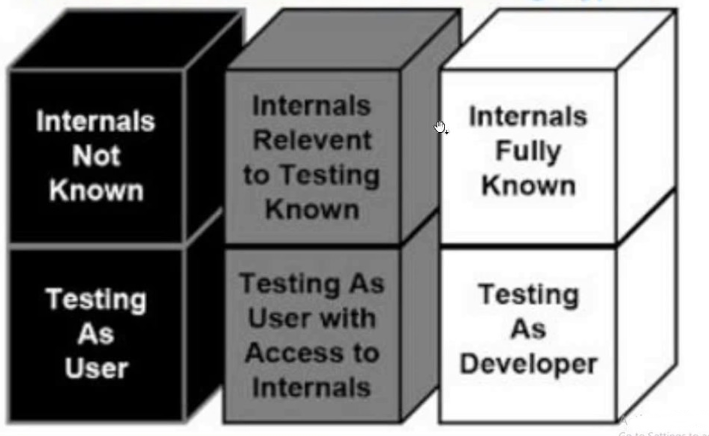


Las Pruebas de Caja Negra, son técnicas de pruebas de software en la cual la funcionalidad se verifica sin tomar en cuenta la estructura interna de código, detalles de implementación o escenarios de ejecución internos en el software.


## Tipos de test - Pruebas unitarias

- Con ellas probamos las unidades del software, normalmente métodos.
- Por ejemplo, escribimos estas pruebas para comprobar si un método de una clase funciona
  correctamente de forma aislada.
- Las pruebas unitarias corresponden a la visión de los desarrolladores
- Las dependencias complejas o interacciones con el exterior se gestionan realizando mocks
  (objetos ya programados con los datos que se espera recibir).
- Aunque estés probando un método que realice una serie de cosas y al final mande un
  correo electrónico a través de un servidor de correo, en una prueba unitaria no tienes que
  probar que el correo se ha mandado correctamente.
- Buenas pruebas unitarias no irían contra una base de datos, por ejemplo, sino que
  simularían la conexión.
- Si una prueba unitaria falla, sabes que es por un problema en el código.
- Para automatizar y realizar este tipo de pruebas se utilizan framework de tests, por ejemplo
  `pytest`.

## Tipos de test - Pruebas integración

- En este caso probamos cómo es la interacción entre dos o mas unidades del software.
- Este tipo de pruebas verifican que los componentes de la aplicación funcionan correctamente
  actuando en conjunto.
- Siguiendo con el caso anterior, las pruebas de integración son las que comprobarían que se ha
  mandado un email, la conexión real con la base de datos etc.
- Este tipo de pruebas son dependientes del entorno en el que se ejecutan. Si fallan, puede ser
  porque el código esté bien, pero haya un cambio en el entorno.
- Por ejemplo, también podríamos usar pytest para realizar pruebas de integración.

## Tipos de test -  Pruebas funcionales

- El objetivo de las pruebas funcionales es comprobar que el software que se ha creado cumple
  con la función para la que se había pensado.
- En este tipo de pruebas lo que miramos, lo que nos importan, son las entradas y salidas al
  software. Es decir, si ante una serie de entradas el software devuelve los resultados que nosotros
  esperábamos.
- Aquí solo observamos que se cumpla la funcionalidad, no comprobamos que el software esté
  bien hecho, no miramos el diseño del software. Estudiamos el software desde la perspectiva del
  cliente, no del desarrollador.
- Por eso este tipo de pruebas entran dentro de lo que se llaman pruebas de caja negra.

## Tipos de test

### Pruebas de Carga

- Las pruebas de carga son un tipo de prueba de rendimiento del sistema.
- Ver cómo se comporta el sistema ante X usuarios que entran concurrentemente a la aplicación y
  realizan ciertas transacciones.

### Pruebas de Estrés
- Este es otro tipo de prueba de rendimiento del sistema.
- El objetivo de estas pruebas es someter al software a situaciones extremas, intentar que el
  sistema se caiga, para ver cómo se comporta, si es capaz de recuperarse o tratar correctamente
  un error grave.

### Pruebas de Aceptación

Por último, las pruebas de aceptación se realizan para comprobar si el software cumple con las
expectativas del cliente, con lo que el cliente realmente pidió.